This notebook demonstrates a quantile normalization workflow for genetic phenotype simulations. First, we simulate phenotypic traits by selecting causal mutations and modeling their effects with a normal distribution (mean=0, variance=1). Then, we generate genetic values for individuals based on additive effect sizes, add environmental noise to create realistic phenotypes with a specified heritability (h²=0.5), and then apply quantile normalization to standardize the distributions. The notebook shows multiple scenarios including single and multi-causal mutation models, demonstrating different normalization options (normalizing genetic values only, phenotypes only, or both) using the quantile_normalize function, with the resulting dataframes containing columns for causal mutation IDs, individual IDs, genetic values, environmental noise, phenotypes, and normalized values.

In [1]:
import numpy as np
import pygrgl
import matplotlib.pyplot as plt

from grg_pheno_sim.effect_size import sim_grg_causal_mutation, additive_effect_sizes, samples_to_individuals
from grg_pheno_sim.model import grg_causal_mutation_model
from grg_pheno_sim.noise_sim import sim_env_noise
from grg_pheno_sim.normalization import quantile_normalize



The following command only serves the purpose of converting the VCF zip file into a GRG that will be used for the phenotype simulation. The bash script below will function as expected given the relative path for the source data file is accurate.

In [2]:
%%script bash --out /dev/null
if [ ! -f test-200-samples.grg ]; then
  grg construct -p 10 ../data/test-200-samples.vcf.gz --out-file test-200-samples.grg
fi

Processing input file in 10 parts.
Auto-calculating number of trees per part.
Converting segments of input data to graphs
100%|██████████| 10/10 [00:07<00:00,  1.37it/s]
Merging...


In [3]:
grg_1 = pygrgl.load_immutable_grg("test-200-samples.grg") #loading in a sample grg stored in the same directory


First, we demonstrate quantile normalization for single causal mutation's phenotypic dataframe.

In [4]:
mean_1 = 0.0  
var_1 = 1.0  
model_normal = grg_causal_mutation_model("normal", mean=mean_1, var=var_1)

In [5]:

trait_df_normal = sim_grg_causal_mutation(grg_1, num_causal=1000, model=model_normal, random_seed=1)
sample_nodes_df = additive_effect_sizes(grg_1, trait_df_normal)
individual_genetic_value_df = samples_to_individuals(sample_nodes_df) #non-normalized genetic value df
phenotypes = sim_env_noise(individual_genetic_value_df, h2=0.5) #simulating environmental noise without normalizing genetic values
phenotype_df = phenotypes.phenotype_df
phenotype_df_1 = phenotype_df.copy()
phenotype_df_2 = phenotype_df.copy()
phenotype_df


,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype
0,0,0,-16.501664,0.848621,-15.653043
1,0,1,-2.454348,-9.929435,-12.383783
2,0,2,-17.303803,5.818990,-11.484813
3,0,3,6.641214,-3.713442,2.927771
4,0,4,-8.710213,13.951626,5.241414
...,...,...,...,...,...
195,0,195,12.536488,-7.170688,5.365801
196,0,196,16.549154,-0.843541,15.705613
197,0,197,5.463626,-5.651558,-0.187933
198,0,198,-0.663779,2.324372,1.660593


In [6]:
quantile_normalize_phenotype_df = quantile_normalize(phenotype_df) #quantile normalized to the normal distribution
quantile_normalize_phenotype_df

,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype,normalized_phenotype
0,0,0,-16.501664,0.848621,-15.653043,-0.087845
1,0,1,-2.454348,-9.929435,-12.383783,0.138304
2,0,2,-17.303803,5.818990,-11.484813,0.189118
3,0,3,6.641214,-3.713442,2.927771,0.859617
4,0,4,-8.710213,13.951626,5.241414,1.103063
...,...,...,...,...,...,...
195,0,195,12.536488,-7.170688,5.365801,1.126391
196,0,196,16.549154,-0.843541,15.705613,1.475791
197,0,197,5.463626,-5.651558,-0.187933,0.722479
198,0,198,-0.663779,2.324372,1.660593,0.789192


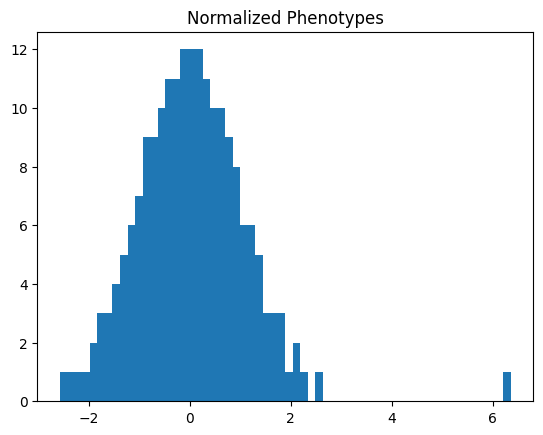

Mean of phenotypes: 0.03180670444848707
Standard deviation of phenotypes: 1.0757478165020662


In [7]:
plt.hist(quantile_normalize_phenotype_df["normalized_phenotype"], bins=60)
plt.title("Normalized Phenotypes")
plt.show()
print("Mean of phenotypes: " + str(quantile_normalize_phenotype_df['normalized_phenotype'].mean()))
print("Standard deviation of phenotypes: " + str(quantile_normalize_phenotype_df['normalized_phenotype'].std()))

In [8]:
quantile_normal_genetic_df = quantile_normalize(phenotype_df_1, phenotype_normalize=False)
quantile_normal_genetic_df

,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype,normalized_genetic_value
0,0,0,-16.501664,0.848621,-15.653043,-0.398855
1,0,1,-2.454348,-9.929435,-12.383783,0.722479
2,0,2,-17.303803,5.818990,-11.484813,-0.453762
3,0,3,6.641214,-3.713442,2.927771,1.372204
4,0,4,-8.710213,13.951626,5.241414,0.189118
...,...,...,...,...,...,...
195,0,195,12.536488,-7.170688,5.365801,2.053749
196,0,196,16.549154,-0.843541,15.705613,2.326348
197,0,197,5.463626,-5.651558,-0.187933,1.281552
198,0,198,-0.663779,2.324372,1.660593,0.806421


In [9]:
quantile_both_normalized = quantile_normalize(phenotype_df_2, normalize_both=True)
quantile_both_normalized

,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype,normalized_genetic_value,normalized_phenotype
0,0,0,-16.501664,0.848621,-15.653043,-0.398855,-0.087845
1,0,1,-2.454348,-9.929435,-12.383783,0.722479,0.138304
2,0,2,-17.303803,5.818990,-11.484813,-0.453762,0.189118
3,0,3,6.641214,-3.713442,2.927771,1.372204,0.859617
4,0,4,-8.710213,13.951626,5.241414,0.189118,1.103063
...,...,...,...,...,...,...,...
195,0,195,12.536488,-7.170688,5.365801,2.053749,1.126391
196,0,196,16.549154,-0.843541,15.705613,2.326348,1.475791
197,0,197,5.463626,-5.651558,-0.187933,1.281552,0.722479
198,0,198,-0.663779,2.324372,1.660593,0.806421,0.789192


Now, we show the same for multivariate simulation.

In [10]:
mean_1 = np.zeros(2)
cov_1 = np.eye(2) 
model_normal_multi = grg_causal_mutation_model("multivariate normal", mean=mean_1, cov=cov_1)



In [11]:
trait_df_normal_multi = sim_grg_causal_mutation(grg_1, num_causal=1000, model=model_normal_multi, random_seed=1)
sample_nodes_df_multi = additive_effect_sizes(grg_1, trait_df_normal_multi)
individuals = samples_to_individuals(sample_nodes_df_multi)
phenotypes_user_defined_multi_normal = sim_env_noise(individuals, user_defined=True, means=mean_1, cov=cov_1) #simulates noise from the multivariate standard normal distribution with means of zero and an identity matrix for covariance
phenotypes_user_defined_multi_normal_df = phenotypes_user_defined_multi_normal.phenotype_df
phenotypes_user_defined_multi_normal_df_1 = phenotypes_user_defined_multi_normal_df.copy()
phenotypes_user_defined_multi_normal_df_2 = phenotypes_user_defined_multi_normal_df.copy()
phenotypes_user_defined_multi_normal_df

,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype
0,0,0,-37.942379,0.978934,-36.963446
1,1,0,-23.087706,-0.441136,-23.528842
2,0,1,-19.908226,0.856220,-19.052006
3,1,1,-22.240029,-0.470692,-22.710721
4,0,2,-9.933216,1.056565,-8.876651
...,...,...,...,...,...
395,1,197,6.632294,-0.071702,6.560592
396,0,198,-28.121344,0.296415,-27.824930
397,1,198,-17.527029,-1.224111,-18.751140
398,0,199,-10.601552,-0.837548,-11.439101


In [12]:
quantile_normalized_multi_pheno = quantile_normalize(phenotypes_user_defined_multi_normal_df)
quantile_normalized_multi_pheno

,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype,normalized_phenotype
0,0,0,-37.942379,0.978934,-36.963446,-1.372204
1,1,0,-23.087706,-0.441136,-23.528842,-0.896473
2,0,1,-19.908226,0.856220,-19.052006,0.371856
3,1,1,-22.240029,-0.470692,-22.710721,-0.823894
4,0,2,-9.933216,1.056565,-8.876651,1.405072
...,...,...,...,...,...,...
395,1,197,6.632294,-0.071702,6.560592,1.554774
396,0,198,-28.121344,0.296415,-27.824930,-0.524401
397,1,198,-17.527029,-1.224111,-18.751140,-0.524401
398,0,199,-10.601552,-0.837548,-11.439101,1.015222


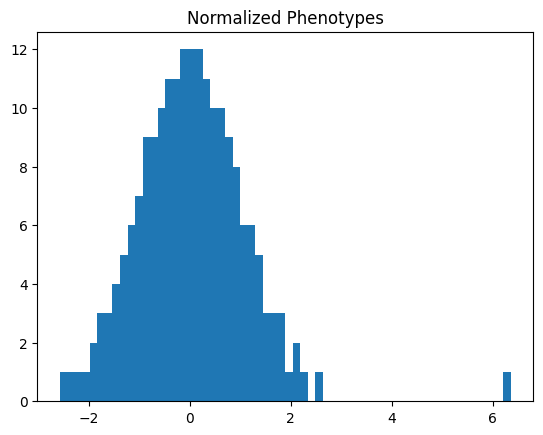

Mean of phenotypes: 0.031806704448487065
Standard deviation of phenotypes: 1.0757478165020662


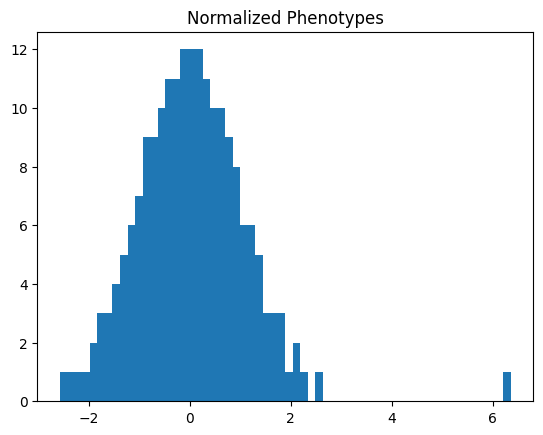

Mean of phenotypes: 0.03180670444848708
Standard deviation of phenotypes: 1.0757478165020662


In [13]:
df_dict_test = {k: v.sort_values('individual_id') for k, v in quantile_normalized_multi_pheno.groupby('causal_mutation_id')}

num = len(df_dict_test)

for i in range(num):
  temp_df = df_dict_test[i]
  plt.hist(temp_df["normalized_phenotype"], bins=60)
  plt.title("Normalized Phenotypes")
  plt.show()
  print("Mean of phenotypes: " + str(temp_df['normalized_phenotype'].mean()))
  print("Standard deviation of phenotypes: " + str(temp_df['normalized_phenotype'].std()))

In [14]:
quantile_normalized_multi_genetic = quantile_normalize(phenotypes_user_defined_multi_normal_df_1, phenotype_normalize=False)
quantile_normalized_multi_genetic

,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype,normalized_genetic_value
0,0,0,-37.942379,0.978934,-36.963446,-1.372204
1,1,0,-23.087706,-0.441136,-23.528842,-0.915365
2,0,1,-19.908226,0.856220,-19.052006,0.318639
3,1,1,-22.240029,-0.470692,-22.710721,-0.823894
4,0,2,-9.933216,1.056565,-8.876651,1.253565
...,...,...,...,...,...,...
395,1,197,6.632294,-0.071702,6.560592,1.554774
396,0,198,-28.121344,0.296415,-27.824930,-0.524401
397,1,198,-17.527029,-1.224111,-18.751140,-0.453762
398,0,199,-10.601552,-0.837548,-11.439101,1.150349


In [15]:
quantile_normalized_multi_both = quantile_normalize(phenotypes_user_defined_multi_normal_df_2, normalize_both=False)
quantile_normalized_multi_both

,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype,normalized_phenotype
0,0,0,-37.942379,0.978934,-36.963446,-1.372204
1,1,0,-23.087706,-0.441136,-23.528842,-0.896473
2,0,1,-19.908226,0.856220,-19.052006,0.371856
3,1,1,-22.240029,-0.470692,-22.710721,-0.823894
4,0,2,-9.933216,1.056565,-8.876651,1.405072
...,...,...,...,...,...,...
395,1,197,6.632294,-0.071702,6.560592,1.554774
396,0,198,-28.121344,0.296415,-27.824930,-0.524401
397,1,198,-17.527029,-1.224111,-18.751140,-0.524401
398,0,199,-10.601552,-0.837548,-11.439101,1.015222
